# **Lab Exercise: Linear and Logistic Regression**

## **Linear Regression Construction** 

#### **Section 1: Setting Up and Importing Libraries**
*Objective:* Load the required `Python libraries`.


In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### **Section 2: Linear Regression Data Preparation**

*Objective:* Create a dataset for linear regression.

Task: Write the code to:

Create a dataset with features and target variables for linear regression.
Visualize the data using Matplotlib.


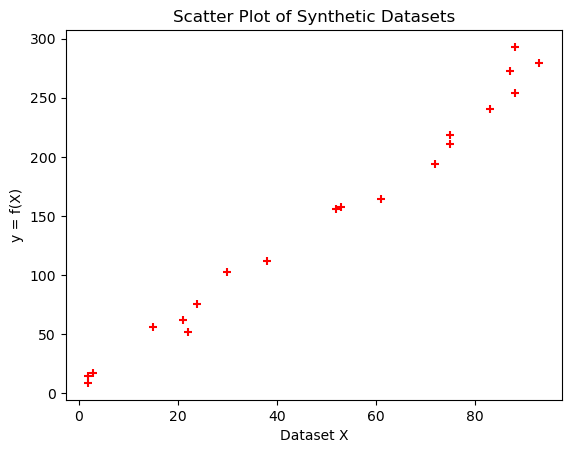

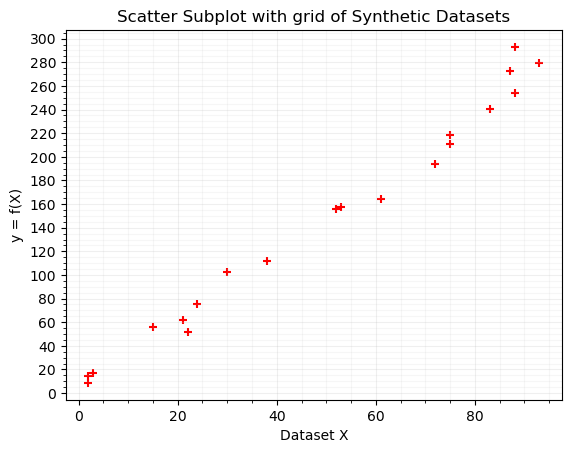

In [96]:
# Generate synthetic data for linear regression
np.random.seed(42)  # For reproducibility
X = np.random.randint(1, 100, 20)  # Features (independent variable)
y = 3 * X + 7 + np.random.normal(0, 15, 20)  # Target with noise

# Visualize the data

# You need to use scatter chart to Visualize the input dataset X & y
# Your chart need to label the x-axis, y-axis and title
# Your chart should use grid

# Your code
plt.xlabel('Dataset X')
plt.ylabel('y = f(X)')
plt.title('Scatter Plot of Synthetic Datasets')
plt.scatter(X,y,color='red',marker='+')
# Get the figure so we can add subplots
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
# Major ticks every 20, minor ticks every 5
xmajor_ticks = np.arange(0, 101, 20)
xminor_ticks = np.arange(0, 101, 5)
ymajor_ticks = np.arange(0, 361, 20)
yminor_ticks = np.arange(0, 361, 5)
ax.set_xticks(xmajor_ticks)
ax.set_xticks(xminor_ticks, minor=True)
ax.set_yticks(ymajor_ticks)
ax.set_yticks(yminor_ticks, minor=True)
# Setup each grid
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.2)
# Add the data
plt.xlabel('Dataset X')
plt.ylabel('y = f(X)')
plt.title('Scatter Subplot with grid of Synthetic Datasets')
plt.scatter(X,y,color='red',marker='+')
# Show the plot
plt.show()

#### **Section 3: Implementing Linear Regression**

*Objective:* Practice linear regression construction.

Task: Write the code to:

Write a Linear Regression function to minimize the cost function and find the optimal parameters.


For **Undergraduate students** (CS457): You can **choose** any of the following methods to implement it.
1. You can use any scikit-learn library.
2. Manually write cost function & gradient descent function to implement it.

For **Graduate students** (CS557): You have to implement it by
1. Manually write cost function & gradient descent function to implement it.


In [97]:
X_train = pd.DataFrame(X)
y_train = pd.DataFrame(y)
X_train.rename(columns={0: 'Data'}, inplace='true')
y_train.rename(columns={0: 'Values'}, inplace='true')
X_train
#y_train.Values

,Data
0,52
1,93
2,15
3,72
4,61
5,21
6,83
7,87
8,75
9,75


In [98]:
# Your code for a linear regression model

# Sklearn model
from sklearn import linear_model

# Prepare data
X_train = pd.DataFrame(X)
y_train = pd.DataFrame(y)
X_train.rename(columns={0: 'Data'}, inplace='true')
y_train.rename(columns={0: 'Values'}, inplace='true')
y_train = y_train.Values
# Create the linear regression object
reg = linear_model.LinearRegression()
# Building the Model
reg.fit(X_train,y_train)
# Review Model parameter 
reg.coef_, reg.intercept_

(array([2.92415997]), 3.1375660847499205)

In [99]:
# Your code for a linear regression model

# Manually write cost function & gradient descent 

# Reshape X to include a bias term (column of ones for the intercept) by np.column_stack
# your code
X_manual = np.column_stack((np.ones(len(X)), X))
y_manual = y_train

# Define the cost function for linear regression
def compute_cost(X, y, theta):
    """
    Compute the cost function for linear regression.
    """
    # Calculate the linear regression
    cost = np.sum(np.square(np.dot(X, theta) - y)) / (2 * len(y))
    # Return the cost
    return cost
    

# Define the gradient descent function
def gradient_descent(X, y, alpha, iterations):
    """
    Perform gradient descent to minimize the cost function.
    """
    
    theta = np.zeros(2)  # Initialize theta (matching number of features)
    m = len(y)  # Number of training examples

    # Iterate to update theta with iterations
    for i in range(iterations):
        # Update theta[0] (intercept term)
        t0 = theta[0] - (alpha / m) * np.sum(np.dot(X, theta) - y)
        
        # Update theta[1] (slope term)
        t1 = theta[1] - (alpha / m) * np.sum((np.dot(X, theta) - y) * X[:, 1])
        
        # Update theta with the computed values
        theta = np.array([t0, t1])

    # Return theta
    return theta
    

# Number of iterations for gradient descent
iterations = 5000

# Learning rate for gradient descent
alpha = 0.0001

# Call the gradient descent function to compute optimized parameters
theta = gradient_descent(X_manual, y_manual, alpha, iterations)

# Compute the cost using the optimized parameters
cost = compute_cost(X_manual, y_manual, theta)

# Print the results
print("Optimized theta (parameters):", theta)  # Optimized values for theta (intercept and slope)
print("Final cost:", cost)  # Final cost value to evaluate the fit

Optimized theta (parameters): [0.46266464 2.96267244]
Final cost: 69.69441359034006


### **Section 4: Visualizing the Linear Regression Line**

*Objective:* Plot the regression line with the original data.

Task: Plot the data points and the fitted regression line.

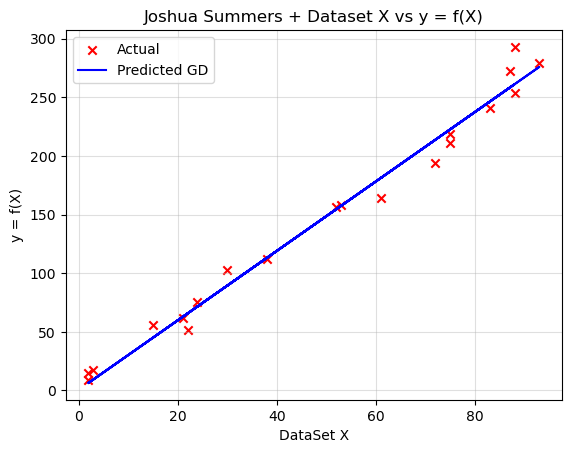

In [100]:
# Compare predictions with actual values
y_pred = np.dot(X_manual, theta)

# Plot the data and regression line
# You need to use scatter chart to Visualize the input dataset X & y
# Your chart should plot the regression line using theta_optimal predictions 
# Your chart need to label the x-axis, y-axis and title
# Your chart should use grid
# Please add your name to the graph title

# Your code:
plt.scatter(X, y, marker='x', color='red', label='Actual')
#samples = np.linspace(np.min(X), np.max(X))
plt.plot(X, y_pred, color = 'blue', label='Predicted GD')

plt.title('Joshua Summers + Dataset X vs y = f(X)')
plt.xlabel('DataSet X')
plt.ylabel('y = f(X)')
plt.grid(alpha=0.4)
plt.legend()
plt.show()

## **Logistic Regression Construction** 

#### **Section 1: Logistic Regression Data Preparation**

*Objective:* Prepare data for logistic regression.

Task: Write the code to:

Create synthetic data for binary classification.
Visualize the data.

#### Dataset Description

Study_hour_Data.csv - The dataset simulates a scenario where students' chances of passing a course are influenced by their study habits and class participation. It contains 200 observations and the following three columns:


**Hours of Study:**
Integer values representing the number of hours a student spends studying in a week.
Range: 0 to 9.

**Class Participation:**
Float values between 0 and 1, representing the level of engagement in class activities.
Higher values indicate greater participation.

**Passed:**
Binary target variable indicating whether the student passed the course:
1: Passed.
0: Did not pass.
Determined based on a weighted combination of Hours of Study and Class Participation (with added noise), with a threshold value of 5.

In [7]:
import pandas as pd
#read data from Pandas 

# Load dataset
# please use Study_hour_Data.csv as your target data
data = pd.read_csv('Study_hour_Data.csv')

# Display basic information
print(data.info())
print(data.describe())

#Generate your training data X & y
X =  data['Hours of Study']
y =  data['Passed']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Hours of Study       200 non-null    int64  
 1   Class Participation  200 non-null    float64
 2   Passed               200 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 4.8 KB
None
       Hours of Study  Class Participation      Passed
count      200.000000           200.000000  200.000000
mean         4.115000             0.505828    0.750000
std          2.751295             0.289315    0.434099
min          0.000000             0.009934    0.000000
25%          2.000000             0.248919    0.750000
50%          4.000000             0.492630    1.000000
75%          6.000000             0.771555    1.000000
max          9.000000             0.992191    1.000000


#### **Section 2: Visualize the data**

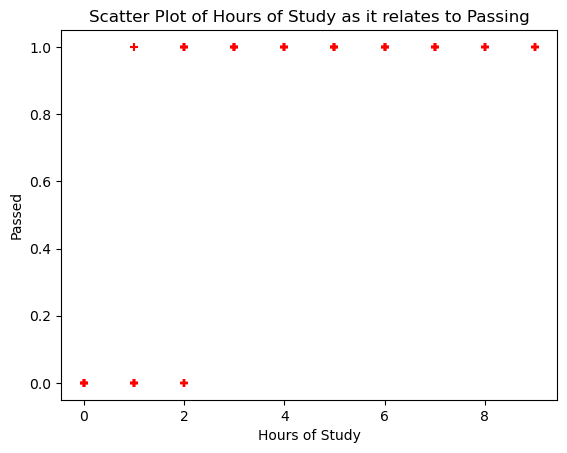

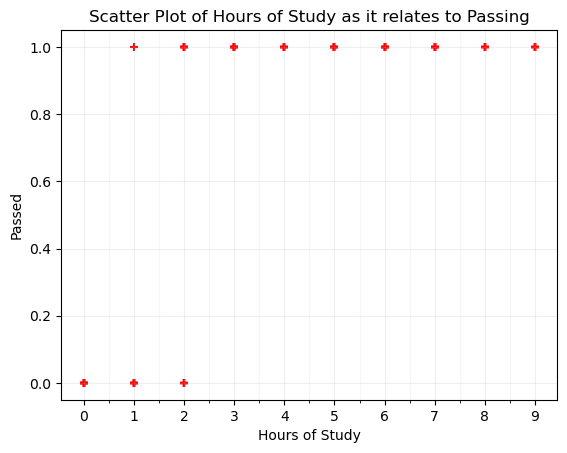

In [10]:
# Visualize the data

# You need to use scatter chart to Visualize the input dataset X & y
# Your chart need to label the x-axis, y-axis and title
# Your chart should use grid
# Please add your name to the graph title

# Your code: 
plt.xlabel('Hours of Study')
plt.ylabel('Passed')
plt.title('Scatter Plot of Hours of Study as it relates to Passing')
plt.scatter(X,y,color='red',marker='+')
# Get the figure so we can add subplots
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
# Major ticks every 20, minor ticks every 5
xmajor_ticks = np.arange(0, 11, 1)
xminor_ticks = np.arange(0, 11, .5)
ax.set_xticks(xmajor_ticks)
ax.set_xticks(xminor_ticks, minor=True)
# Setup each grid
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.2)
# Add the data
plt.xlabel('Hours of Study')
plt.ylabel('Passed')
plt.title('Scatter Plot of Hours of Study as it relates to Passing')
plt.scatter(X,y,color='red',marker='+')
# Show the plot
plt.show()


#### **Section 3: Implementing Logistic Regression**

*Objective:* Implement logistic regression.

For **Undergraduate students** (CS457): You can **choose** any of the following methods to implement it.
1. You can use any scikit-learn library.
2. Manually write cost function & gradient descent function to implement it. 

For **Graduate students** (CS557): You have to implement it by
1. Manually write cost function & gradient descent function to implement it.


Then, use the scipy.optimize library to fit the logistic regression model.

In [78]:
# Your code for logistic regression model

# Sklearn model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Prepare data
X_prepare = data[['Hours of Study']].values
#print(X_prepare)
X_train, X_test, y_train, y_test = train_test_split(X_prepare,y,train_size=0.8)
# Building the Model
model = LogisticRegression()
model.fit(X_train, y_train)

y_predicted = model.predict(X_test)

print("Model Score:",model.score(X_test,y_test))

# Review Model parameter
model.coef_, model.intercept_

Model Score: 1.0


(array([[2.41507195]]), array([-4.40863492]))

In [51]:
# Your logistic regression model

# Define the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


# Define the cost function for logistic regression
def cost_function(theta, X, y):
    trainNum = len(y) # Number of training examples
    probabilities = sigmoid(X.dot(theta)) # Compute the predicted probabilities
    # Compute the cost function for logistic regression
    cost = -(1 / trainNum) * (y.dot(np.log(probabilities)) + (1 - y).dot(np.log(1 - probabilities)))
    return cost

# Define the gradient function
def gradient(theta, X, y):
    trainNum = len(y)  # Number of training examples
    probabilities = sigmoid(X.dot(theta))  # Predicted probabilities using the sigmoid function
    return (1 / trainNum) * X.T.dot(probabilities - y)  # Compute the gradient vector
    

In [82]:
# Train your model
from scipy.optimize import minimize
# Add a bias term (intercept) to X
X_optimize = np.column_stack((np.ones(len(X_train)), X_train))
# Initialize theta (parameters) to zeros
theta = np.zeros(X_optimize.shape[1])

# Minimize the cost function using scipy.optimize
optimal_theta = minimize(fun=cost_function, x0=theta, args=(X_optimize, y_train), method='TNC', jac=gradient, options = {'maxfun': 4000})

# Extract model coefficients
theta_optimized = optimal_theta.x
intercept = theta_optimized[0]  # Intercept
coef = theta_optimized[1:]      # Coefficients

# Print the optimized parameters (theta)
print("Optimized theta (parameters):", intercept, coef)

Optimized theta (parameters): -4.234586680429486 [2.40272797]


/var/folders/b0/gfhb3q152fj7dx14t68p8cch0000gn/T/ipykernel_2750/854644295.py:13: RuntimeWarning: divide by zero encountered in log
  cost = -(1 / trainNum) * (y.dot(np.log(probabilities)) + (1 - y).dot(np.log(1 - probabilities)))


In [ ]:
(array([[2.41507195]]), array([-4.40863492]))

#### **Section 4: Evaluate the model**

*Objective:* Evaluate the model with the fitted data.

Task: build the Predict function, and Calculate accuracy.

In [83]:
# Predict function
def predict(X, theta):
    probabilities = sigmoid(X.dot(theta))
    return (probabilities >= 0.5).astype(int)

# Prepare the X Values
X_test_C = np.column_stack((np.ones(len(X_test)), X_test))
# Make predictions
predictions = predict(X_test_C, theta_optimized)

In [85]:
# Calculate accuracy
accuracy = np.mean(predictions == y_test) * 100
print("Accuracy:", accuracy, "%")

Accuracy: 100.0 %


### **Section 5: Visualizing Logistic Regression Fit**

*Objective:* Plot the logistic regression fit with the original data.

Task: Plot the sigmoid curve over the range of input features.

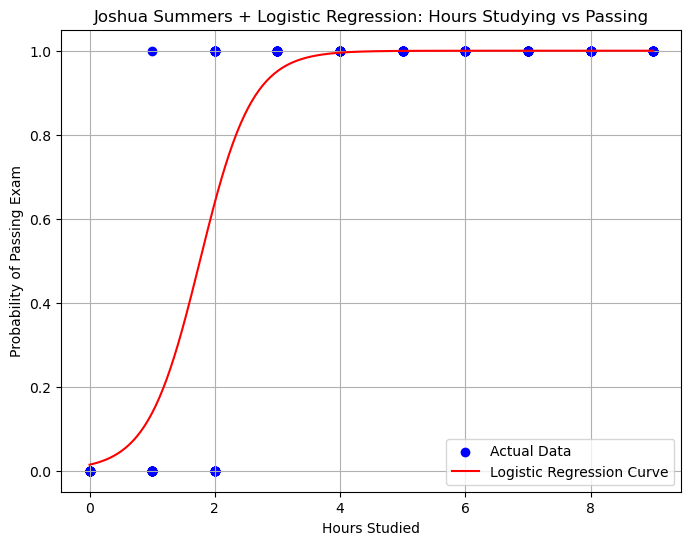

In [88]:
# Plot the data and regression line
# You need to use a scatter chart to Visualize the input dataset X & y
# Your chart should plot the regression line using theta_optimal predictions 
# Your chart need to label the x-axis, y-axis and title
# Your chart should use grid
# Please add your name to the graph title
plt.figure(figsize=(8, 6))
plt.scatter(X_prepare, y, color='blue', label='Actual Data')
hours_studied = np.linspace(X_prepare.min(), X_prepare.max(), 300).reshape(-1, 1)

X_range = np.column_stack((np.ones(len(hours_studied)), hours_studied)) # This adds the a column of 1s alongside the ages
probabilities = sigmoid(X_range.dot(theta_optimized)) # Make predictions on the age range with the optimized theta

plt.plot(hours_studied, probabilities, color='red', label='Logistic Regression Curve')
plt.xlabel('Hours Studied')
plt.ylabel('Probability of Passing Exam')
plt.title('Joshua Summers + Logistic Regression: Hours Studying vs Passing')
plt.legend()
plt.grid()
plt.show()